In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: pip in /usr/local/lib/python2.7/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python2.7/dist-packages (0.20.1)
Requirement already up-to-date: numpy in /usr/local/lib/python2.7/dist-packages (1.15.4)
Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages (0.23.4)


# **                              Εργαστήριο “Νευρωνικά Δίκτυα & Ευφυή Υπολογιστικά Συστήματα” 2018-2019**

#                 Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση.
**Μελέτη datasets του UCI Machine Learning Repository**
**Dataset = Echocardiogram**


# Α. Στοιχεία ομάδας
**Μέλη ομάδας:**

- **Ονοματεπώνυμο: Γεώργιος Σουλιώτης - ΑΜ: 03114201**

- **Ονοματεπώνυμο: Νικόλαος-Ιωάννης Τιτομιχελάκης - ΑΜ: 03114805**

**Αριθμός Ομάδας: Α10**



# Β. Εισαγωγή του dataset


**1. Περιγραφή του Dataset**

Το συγκεκριμένο dataset περιλαμβάνει ηχοκαρδιογράμματα ασθενών οι οποίοι έπαθαν έμφραγμα. Σκοπός του dataset είναι μέσω των στοιχείων αν ένας ασθενής επιβίωσε ή όχι για τουλάχιστον ένα χρόνο μετά το έμφραγμα, να προβλέψει αν ασθενείς οι οποίοι θα πάθουν έμφραγμα, αν πρόκειται να επιβιώσουν για έναν χρόνο ή όχι. Το πιο δύσκολο στην έρευνα αυτή είναι ησωστή πρόβλεψη με τη βοήθεια του υπάρχοντος dataset πως οι ασθενείς θα αποβιώσουν.

**2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών**

Ο αριθμός των δειγμάτων του dataset είναι **132** και των χαρακτηριστικών είναι **12**.

Το είδος των χαρακτηριστικών που περιλαμβάνονται είναι integers, floats καθώς και binary variables  που παίζουν τον ρόλο των booleans καθώς παίρνουν μόνο τιμές 0 ή 1. Υπάρχει και μία μεταβλητή char η οποία περιείχε τα ονόματα των ασθενών, τα οποία όμως για την προστασία των ιδιωτικών στοιχείων, έχουν αντικατασταθεί με τη λέξη name. Το dataset δεν περιέχει μη διατεταγμένα χαρακτηριστικά.

**3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

Όχι δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών στο dataset.

**4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Η ετικέτα των κλάσεων του dataset είναι το χαρακτηριστικό alive-at-1 το οποίο βρίσκεται στην κολόνα 13 και παίρνει την τιμή 0, αν ο ασθενής πέθανε σε < 1 χρόνου, ενώ παίρνει 1 αν ο ασθενής επιβίωσε μετά τον ένα χρόνο.

**5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?**

Χρειάστηκε να διορθώσουμε την γραμμή 50 στο txt του dataset καθώς περιείχε ένα παραπάνω ",".
Επιπλέον, αφαιρέσαμε τις στήλες **10-12** από το dataset καθώς τα χαρακτηριστικά αυτά δεν μας βοηθούν στη λήψη κάποις πληροφορίας.

**6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Υπάρχουν απουσιάζουσες τιμές στο παρών dataset. Τα δείγματα ευτά είναι 71 σε αριθμό και σε ποσοστό **53,78%** επι του συνόλου.

**7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Εκτιμήστε την ισσοροπία του dataset**

Στο παρών dataset υπάρχει μία κλάση.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
!ls

'echocardiogram.data (1).txt'  'echocardiogram.data (4).txt'	 sample_data
'echocardiogram.data (2).txt'   echocardiogram.data.txt
'echocardiogram.data (3).txt'   pima-indians-diabetes.data.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing.imputation import Imputer
df = pd.read_csv("echocardiogram.data.txt", header=None, na_values=["?"])
df = df[np.isfinite(df[12])]
labels = df[df.columns[-1]].copy()
features = df[df.columns[:-4]].copy()
counts = labels.value_counts().to_dict()
print(counts)

{0.0: 50, 1.0: 24}


Από πάνω βλέπουμε ότι υπάρχουν 50 δείγματα με τιμή **0** στην κλάση και 24 με τιμή **1**. Αν αφαιρέσουμε τα δείγματα όπου στην κολόνα 13 (κολόνα κλάσης) έχουν απoυσιάζουσα τιμή ("?"), τότε μας μένουν 74 δείγματα. Από αυτά, το **67,5%** έχουν τιμή 0 και το **32,4%** έχουν τιμή 1. Οπότε η τμή **0** εμφανίζεται 2,08 φορές περισσότερες απ'ότι το **1**. Επομένως το dataset μας **δεν είναι ισορροπημένο**.

**8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**

Το δικό μας dataset περιλαμβάνει 71 δείγματα με απουσιάζουσες τιμές. Επομένως καθώς το ποσοστό των δειγμάτων αυτών είναι μεγαλύτερο απο 5% θα πρέπει να χρησιμοποιήσουμε το μετασχηματιστή “Imputer” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές) του χαρακτηριστικού στο train set.

In [5]:
from sklearn.model_selection import train_test_split
# Split our data
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(features)
imputed_features = imr.transform(features)
imputed_features = pd.DataFrame(imputed_features)
train, test, train_labels, test_labels = train_test_split(imputed_features, labels, test_size=0.2)
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# **Γ. Baseline classification**

Θα εκπαιδεύσουμε τους Classifiers στο train set με default τιμές.

In [6]:
echocardiogram_accuracy = {}
model = dc_uniform.fit(train, train_labels)
echocardiogram_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_0.fit(train, train_labels)
echocardiogram_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels) 
echocardiogram_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
echocardiogram_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
echocardiogram_accuracy['stratified'] = dc_stratified.score(test, test_labels)
print("Classification Accuracy on the Echocardiogram Dataset (20% test set)\n")
sorted_accuracy = [(k, echocardiogram_accuracy[k]) for k in sorted(echocardiogram_accuracy, key=echocardiogram_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the Echocardiogram Dataset (20% test set)

('most frequent label', 0.6666666666666666)
('constant 0', 0.6666666666666666)
('uniform (random)', 0.6)
('stratified', 0.5333333333333333)
('constant 1', 0.3333333333333333)


#**Confusion Matrix για τον Dc Uniform Classifier**

[[5 5]
 [3 2]]


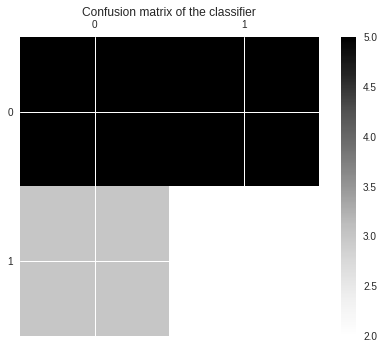

              precision    recall  f1-score   support

           1       0.62      0.50      0.56        10
           2       0.29      0.40      0.33         5

   micro avg       0.47      0.47      0.47        15
   macro avg       0.46      0.45      0.44        15
weighted avg       0.51      0.47      0.48        15



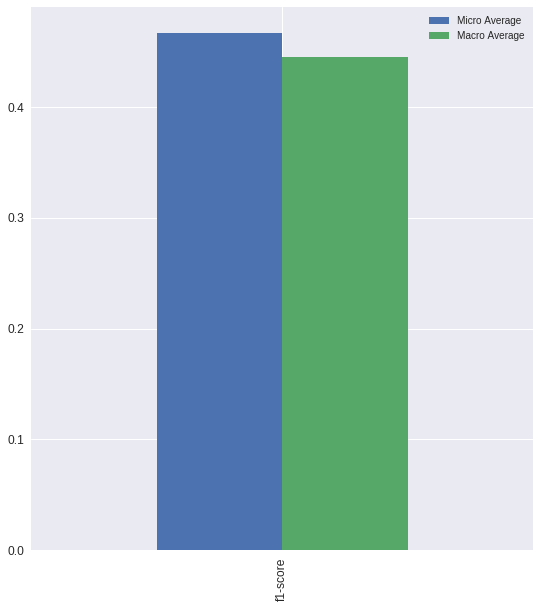

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
preds = dc_uniform.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro1 = micro[2]
macro1 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

#**Confusion Matrix για τον Dc Constant 0 Classifier**

[[10  0]
 [ 5  0]]


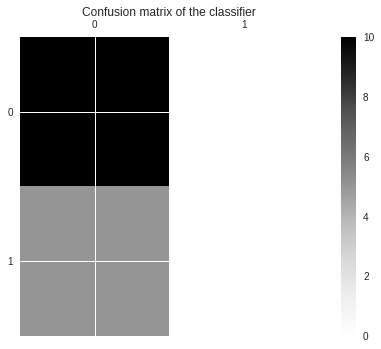

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.00      0.00      0.00         5

   micro avg       0.67      0.67      0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15



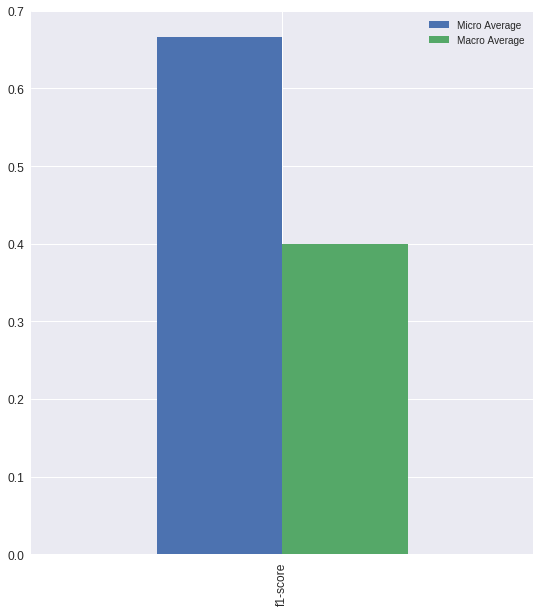

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_0.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro2 = micro[2]
macro2 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

#**Confusion Matrix για τον Dc Constant 1 Classifier**

[[ 0 10]
 [ 0  5]]


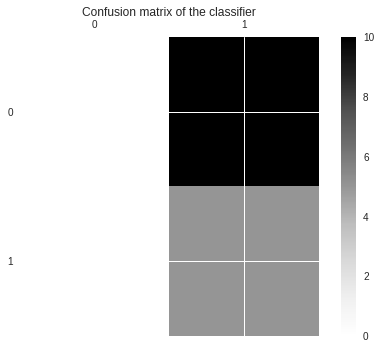

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.33      1.00      0.50         5

   micro avg       0.33      0.33      0.33        15
   macro avg       0.17      0.50      0.25        15
weighted avg       0.11      0.33      0.17        15



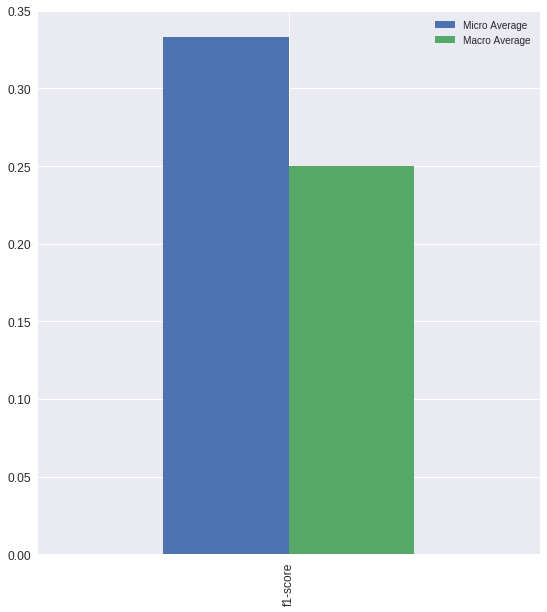

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_1.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro3 = micro[2]
macro3 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

#**Confusion Matrix για τον Dc Most Frequent Classifier**



[[10  0]
 [ 5  0]]


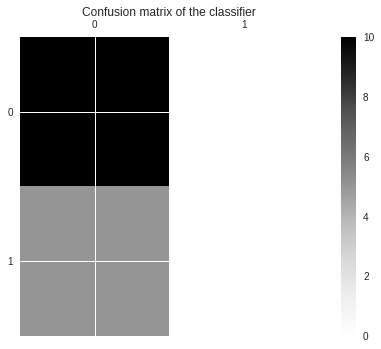

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.00      0.00      0.00         5

   micro avg       0.67      0.67      0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15



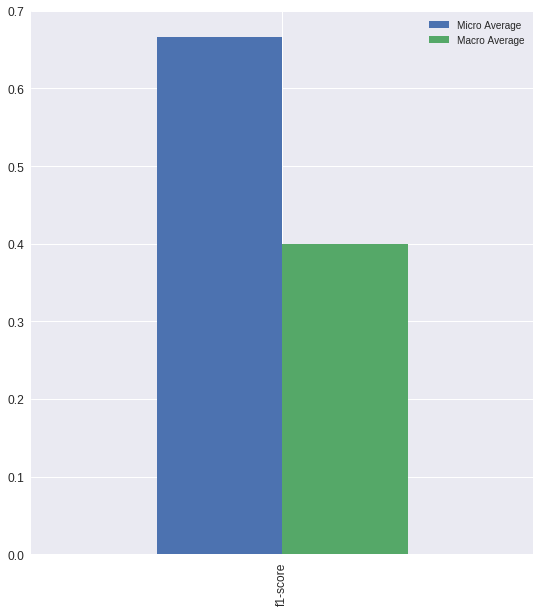

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_most_frequent.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro4 = micro[2]
macro4 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

#**Confusion Matrix για τον Dc Stratified Classifier**


[[8 2]
 [5 0]]


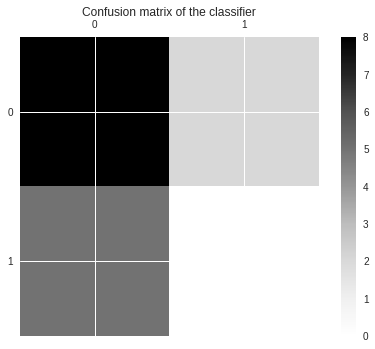

              precision    recall  f1-score   support

           1       0.62      0.80      0.70        10
           2       0.00      0.00      0.00         5

   micro avg       0.53      0.53      0.53        15
   macro avg       0.31      0.40      0.35        15
weighted avg       0.41      0.53      0.46        15



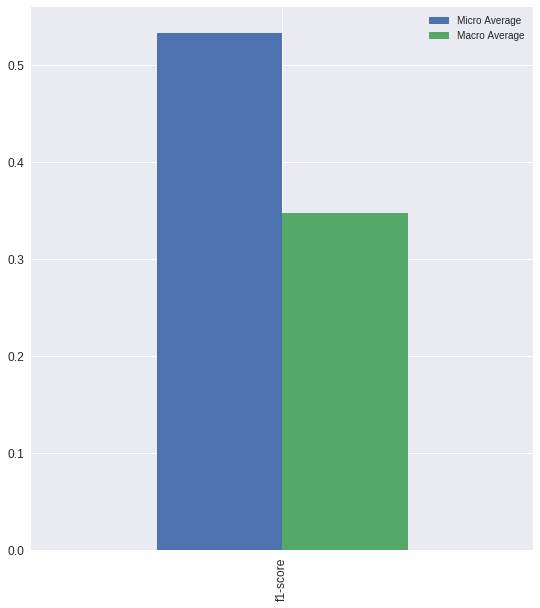

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_stratified.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro5 = micro[2]
macro5 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

#**Confusion Matrix για τον KNN**

[[10  0]
 [ 1  4]]


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


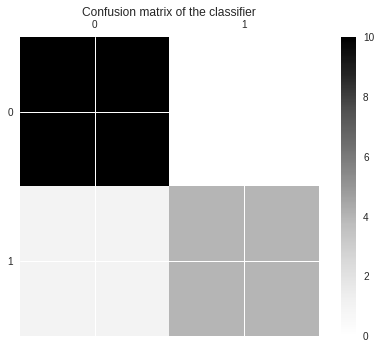

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.80      0.89         5

   micro avg       0.93      0.93      0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



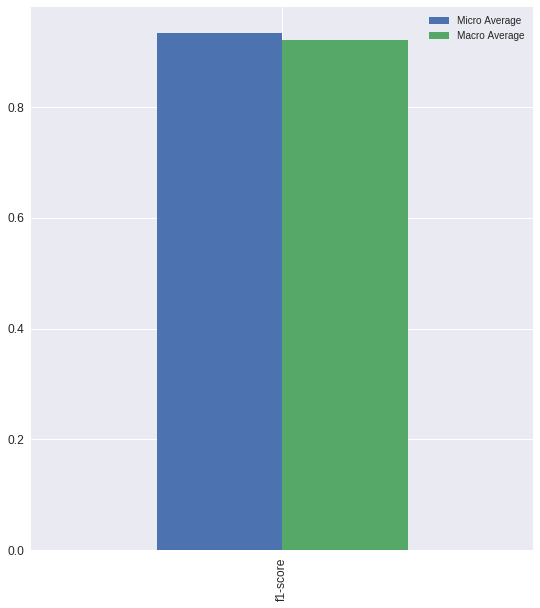

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_knn = knn.fit(train, train_labels)
preds = knn.predict(test)
knn_pred = preds
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
cnf_matrix = confusion_matrix(test_labels, preds)
# τυπώνουμε το confusion matrix
print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds, target_names=('1', '2')))
micro6 = micro[2]
macro6 = macro[2]
index = ['f1-score']
f1 = pd.DataFrame({'Micro Average': micro[2], 'Macro Average': macro[2]}, index=index)
import matplotlib.pyplot as plt
ax = f1[['Micro Average', 'Macro Average']].plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=12)
plt.show()

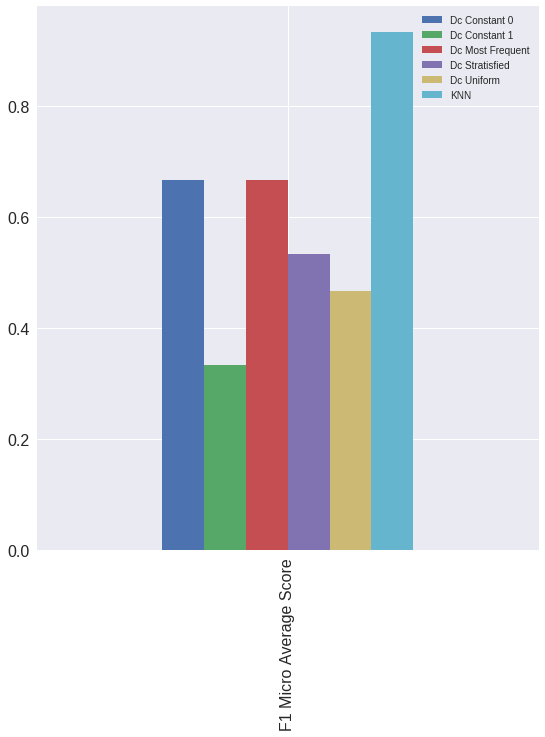

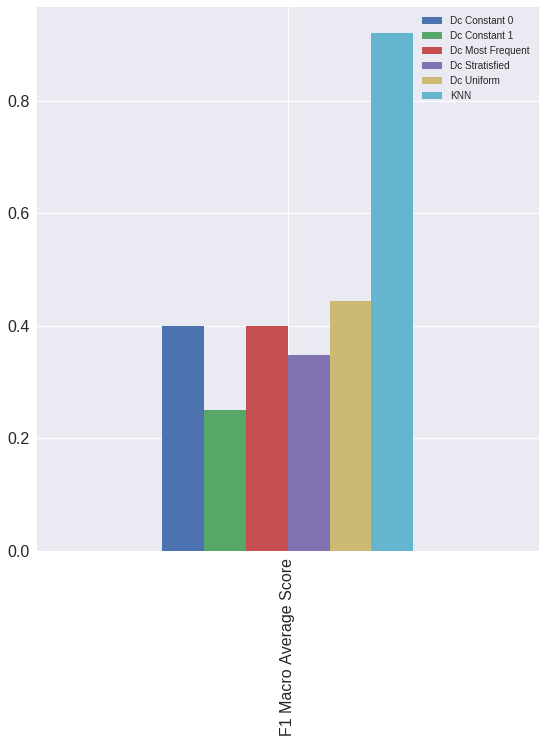

In [13]:
index = ['F1 Micro Average Score']
microall = pd.DataFrame({'Dc Uniform': micro1, 'Dc Constant 0': micro2, 'Dc Constant 1': micro3, 'Dc Most Frequent': micro4, 'Dc Stratisfied': micro5, 'KNN': micro6}, index=index)
import matplotlib.pyplot as plt
ax = microall.plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=16)
plt.show()

index = ['F1 Macro Average Score']
macroall = pd.DataFrame({'Dc Uniform': macro1, 'Dc Constant 0': macro2, 'Dc Constant 1': macro3, 'Dc Most Frequent': macro4, 'Dc Stratisfied': macro5, 'KNN': macro6}, index=index)
import matplotlib.pyplot as plt
ax = macroall.plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=16)
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_micro')
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of k in the train set by f1 (micro), 10-folds (20%% test set) (%s)"  %optimal_k)
print("\n")
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(train, train_labels)
knn_pred1 = knn.predict(test)
print("Classification Precision, Recall, F1 on the Echocardiogram Dataset (20% test set)")
print("\n")
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("k Nearest Neighbours k = 5")
print(classification_report(test_labels, knn_pred))
print("\n")
print("k Nearest Neighbours k optimized (%s)" % optimal_k)
print(classification_report(test_labels, knn_pred1))

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

Optimal number of k in the train set by f1 (weighted), 10-folds (20% test set) (23)


Classification Precision, Recall, F1 on the Pima Indian Diabetes Dataset (20% test set)


k Nearest Neighbours k = 5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       1.00      0.80      0.89         5

   micro avg       0.93      0.93      0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



k Nearest Neighbours k optimized (23)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [15]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, train_labels, cv=10, scoring='f1_macro')
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]
optimal_k2 = neighbors[MSE.index(min(MSE))]
print("Optimal number of k in the train set by f1 (macro), 10-folds (20%% test set) (%s)"  %optimal_k2)
print("\n")
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(train, train_labels)
knn_pred2 = knn.predict(test)
print("Classification Precision, Recall, F1 on the Echocardiogram Dataset (20% test set)")
print("\n")
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("k Nearest Neighbours k = 5")
print(classification_report(test_labels, knn_pred))
print("\n")
print("k Nearest Neighbours k optimized (%s)" % optimal_k2)
print(classification_report(test_labels, knn_pred2))

/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and w

Optimal number of k in the train set by f1 (weighted), 10-folds (20% test set) (23)


Classification Precision, Recall, F1 on the Pima Indian Diabetes Dataset (20% test set)


k Nearest Neighbours k = 5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       1.00      0.80      0.89         5

   micro avg       0.93      0.93      0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15



k Nearest Neighbours k optimized (23)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
